### Problem Statement

 An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


### Business Goal 

X Education want to develop a model to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# Inspecting the Data

In [2]:
#Reading the data
lead=pd.read_csv(r'D:\Upgrad Data Science PGDDS\Machine Learning I\Lead Score Case Study\Lead Scoring Assignment\Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking the shape of the dataframe
lead.shape

(9240, 37)

In [4]:
#Checking the info of the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Observing the stats for numerical columns
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**In the above table we can see that the difference between the max and the 75% percentile is too huge which means there are outliers in the data.**  
**Variables like "TotalVisits", "Total Time Spent on Website" and "Page Views Per Visit" have outliers in them.**

In [6]:
#Checking for duplicate values in the dataframe
duplicates=lead[lead.duplicated()]
duplicates

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


**Hence we can conclude that there are no duplicate values in the dataset.**

In [7]:
#Checking for unique values
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

# Data Cleaning

In [8]:
#Removing "Prospect ID" and "Lead Number" as they have different values and is not neccesary in our study.
lead=lead.drop(["Prospect ID","Lead Number"],1)

In [9]:
#Converting all the select values to NaN
lead=lead.replace("Select",np.nan)

In [10]:
#Fnding the total number of null/missing values in the dataframe
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
#Calculating the null/missing values percentage
100*round(lead.isnull().sum()/len(lead),4)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
#Checking columns more than 40% missing values
red_cols=lead.isnull().sum()
red_cols=red_cols[(100*(lead.isnull().sum()/len(lead))>40)]
red_cols

How did you hear about X Education    7250
Lead Quality                          4767
Lead Profile                          6855
Asymmetrique Activity Index           4218
Asymmetrique Profile Index            4218
Asymmetrique Activity Score           4218
Asymmetrique Profile Score            4218
dtype: int64

In [13]:
#Dropping columns more than 40% missing values
lead=lead.drop(red_cols.keys(),1)

In [14]:
#Checking for updated missing values percentage
100*round(lead.isnull().sum()/len(lead),4)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Lead Source

In [15]:
#Checking the counts of the entries in that column
lead["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
NC_EDM                  1
testone                 1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

**We will impute the missing values with the highest occuring value which is Google here.**

#### Visualising the count of Lead Sources column before imputation

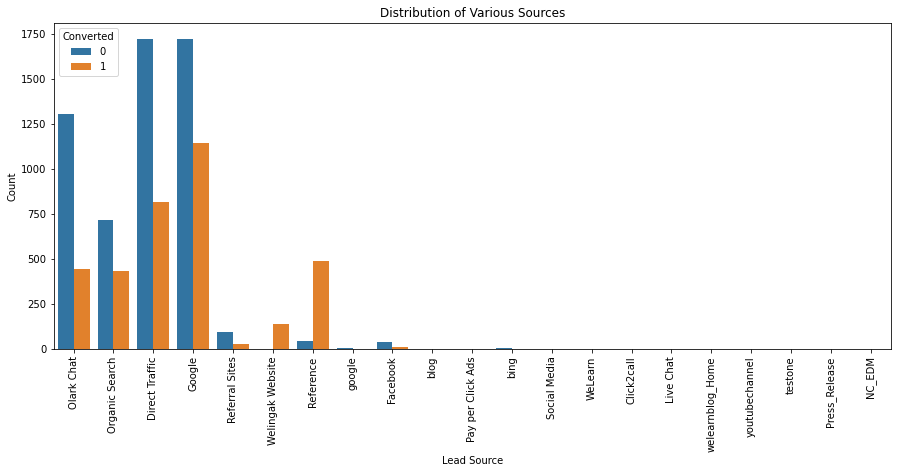

In [16]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Lead Source"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Various Sources")
plt.xlabel("Lead Source")
plt.ylabel("Count")
plt.show()

**Inferences Drawn:**
 1. Mainly the source of the lead is Google. It has the maximum number of converted leads as well followed by Direct Traffic.
 2. The rate of conversion of leads from Welingak Website is really high.
 3. According to the graph, the number of converted leads is good in Reference, Welingak Website, Organic Search. Hence a focus on such sources might increase our conversion rate.

In [17]:
#Checking how many converted cases are there in the column Lead Source
lead.groupby("Lead Source")["Converted"].sum().sort_values(ascending=False)

Lead Source
Google               1147
Direct Traffic        818
Reference             490
Olark Chat            448
Organic Search        436
Welingak Website      140
Referral Sites         31
Facebook               13
Click2call              3
Live Chat               2
Social Media            1
WeLearn                 1
bing                    1
NC_EDM                  1
welearnblog_Home        0
Press_Release           0
Pay per Click Ads       0
blog                    0
google                  0
testone                 0
youtubechannel          0
Name: Converted, dtype: int64

**We see that the converted cases are very less in some of the entries in this column. Hence we can collate them into one single entry so that it is easier to visualize the data in dummy variable creation.**

In [18]:
#replacing and grouping NaN Values and all the others with 
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM',"Live Chat"],
                                                  'Other Sources')
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Google')

In [19]:
#Checking the count of the different entries in the column again
lead["Lead Source"].value_counts(dropna=False)

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Other Sources         21
Name: Lead Source, dtype: int64

In [20]:
#Checking how many converted cases are there in the column Lead Source again
lead.groupby("Lead Source")["Converted"].sum().sort_values(ascending=False)

Lead Source
Google              1176
Direct Traffic       818
Reference            490
Olark Chat           448
Organic Search       436
Welingak Website     140
Referral Sites        31
Social Media          14
Other Sources          8
Name: Converted, dtype: int64

#### Visualising the count of Lead Sources column after imputation

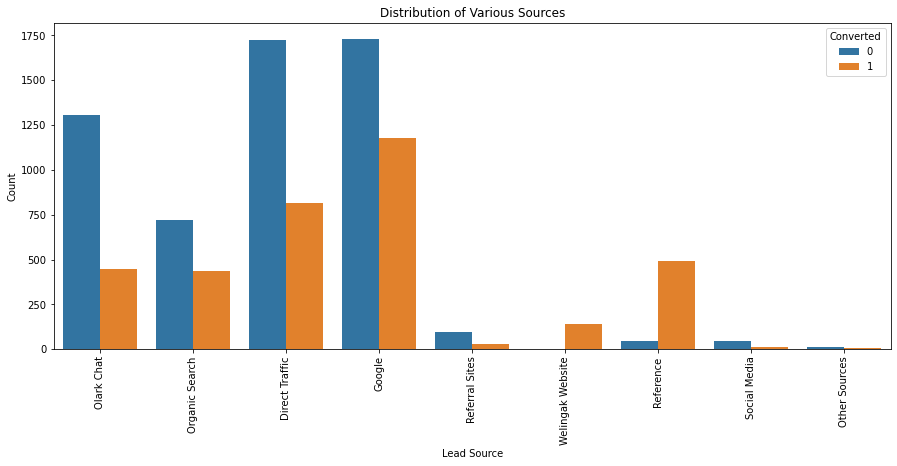

In [21]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Lead Source"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Various Sources")
plt.xlabel("Lead Source")
plt.ylabel("Count")
plt.show()

### TotalVisits

In [22]:
#Checking for % of the value counts in this column
100*lead["TotalVisits"].value_counts(normalize=True,dropna=False)

0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
27.0      0.054113
25.0      0.054113
24.0      0.054113
22.0      0.032468
26.0      0.021645
29.0      0.021645
28.0      0.021645
115.0     0.010823
54.0      0.010823
43.0      0.010823
30.0      0.010823
32.0      0.010823
74.0      0.010823
251.0     0.010823
41.0      0.010823
141.0     0.010823
42.0      0.010823
55.0      0.010823
Name: TotalVisits, dtype: float64

**Since the highest number is for 0.0, we will impute the missing values with 0.0.**

In [23]:
#Imputing the missing value with mode
lead.TotalVisits=lead.TotalVisits.fillna(value="0.0")

### Page Views Per Visit

In [24]:
#Checking for % of the value counts in this column
100*lead["Page Views Per Visit"].value_counts(normalize=True,dropna=False)

0.00     23.690476
2.00     19.426407
3.00     12.943723
4.00      9.696970
1.00      7.045455
5.00      5.595238
1.50      3.311688
6.00      2.640693
2.50      2.608225
NaN       1.482684
7.00      1.439394
3.50      1.017316
8.00      0.930736
1.33      0.714286
1.67      0.649351
2.33      0.638528
2.67      0.584416
9.00      0.487013
4.50      0.465368
1.75      0.303030
3.33      0.292208
10.00     0.270563
1.25      0.248918
5.50      0.227273
2.25      0.205628
11.00     0.194805
3.67      0.173160
1.80      0.140693
6.50      0.140693
2.75      0.129870
1.40      0.119048
2.80      0.097403
2.20      0.097403
4.33      0.097403
14.00     0.097403
2.17      0.086580
1.60      0.086580
3.25      0.086580
2.40      0.064935
13.00     0.064935
12.00     0.054113
1.20      0.054113
15.00     0.043290
1.83      0.043290
2.60      0.043290
1.43      0.043290
1.71      0.043290
3.40      0.043290
1.38      0.032468
5.67      0.032468
16.00     0.032468
1.57      0.032468
4.75      0.

**Here also since the missing values percentage is less, we can impute the missing value to the highest occuring value.**

In [25]:
#Imputing the missing value with mode
lead["Page Views Per Visit"]=lead["Page Views Per Visit"].fillna(value="0.00")

### Visualising the count of Last Activity column before imputation

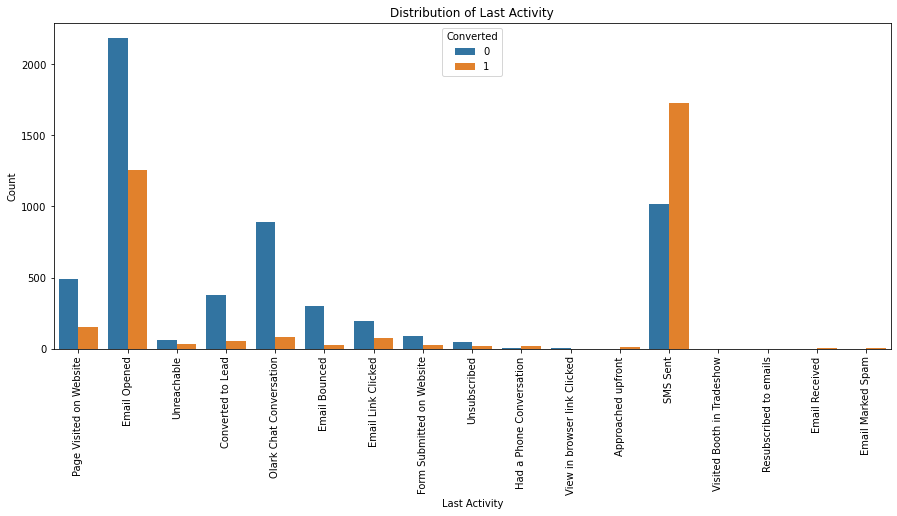

In [26]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Last Activity"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Last Activity")
plt.xlabel("Last Activity")
plt.ylabel("Count")
plt.show()

**Inferences Drawn:**
1. The converted cases last activity was SMS sent followed by Email opened. Hence focusing on such customers would be beneficicary.

In [27]:
#Checking the count in percentage
100*lead["Last Activity"].value_counts(normalize=True,dropna=False)

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

**Here also since the missing values percentage is less, we can impute the missing value to the highest occuring value.**

In [28]:
#Checking the count in numbers
lead["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [29]:
#Checking how many converted cases are there in the column Last Activity
lead.groupby("Last Activity")["Converted"].sum().sort_values(ascending=False)

Last Activity
SMS Sent                        1727
Email Opened                    1253
Page Visited on Website          151
Olark Chat Conversation           84
Email Link Clicked                73
Converted to Lead                 54
Unreachable                       31
Form Submitted on Website         28
Email Bounced                     26
Had a Phone Conversation          22
Unsubscribed                      16
Approached upfront                 9
Email Marked Spam                  2
Email Received                     2
View in browser link Clicked       1
Resubscribed to emails             1
Visited Booth in Tradeshow         0
Name: Converted, dtype: int64

**We can see that the converted cases are very less in some of the entries in this column. Hence we would collate those entries to a single entry.**

In [30]:
#Imputing missing values and collating low and zero converted cases.
lead["Last Activity"]=lead["Last Activity"].fillna(value="Email Opened")
lead["Last Activity"]=lead["Last Activity"].replace(["Approached upfront","Email Marked Spam","Email Received",
                                                     "Resubscribed to emails","View in browser link Clicked",
                                                     "Visited Booth in Tradeshow"],"Other Activities")

In [31]:
#Checking the count in numbers again
lead["Last Activity"].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Other Activities               21
Name: Last Activity, dtype: int64

In [32]:
#Checking how many converted cases are there in the column Last Activity again
lead.groupby("Last Activity")["Converted"].sum().sort_values(ascending=False)

Last Activity
SMS Sent                     1727
Email Opened                 1334
Page Visited on Website       151
Olark Chat Conversation        84
Email Link Clicked             73
Converted to Lead              54
Unreachable                    31
Form Submitted on Website      28
Email Bounced                  26
Had a Phone Conversation       22
Unsubscribed                   16
Other Activities               15
Name: Converted, dtype: int64

#### Visualising the count of Last Activity column after  imputation

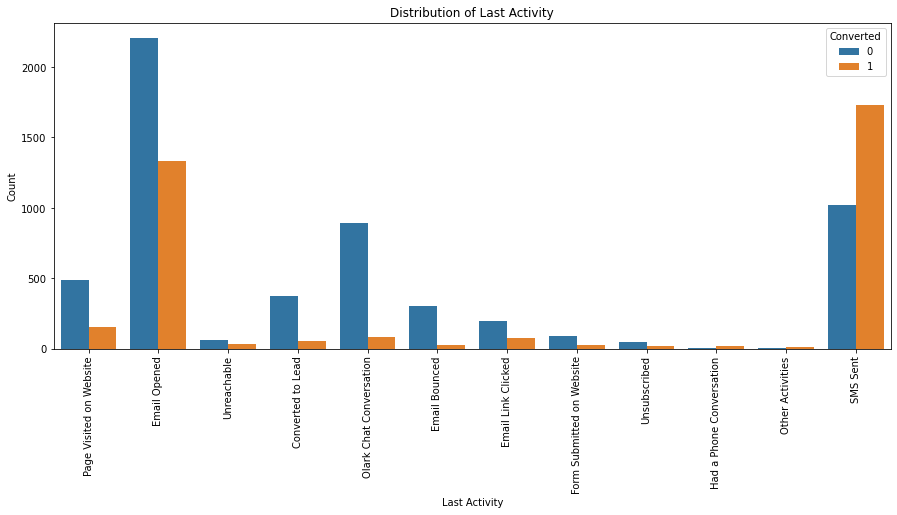

In [33]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Last Activity"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Last Activity")
plt.xlabel("Last Activity")
plt.ylabel("Count")
plt.show()

**Inference Drawn:**
1. The max number of converted cases are coming from SMS Sent even though than the non converted cases are low followed by Email opened.
2. Activities like Had a Phone COnversation, other activities are way too less than others.

In [34]:
#Checking the count in percentage
100*lead["Country"].value_counts(normalize=True,dropna=False)

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
South Africa             0.043290
Kuwait                   0.043290
Canada                   0.043290
Germany                  0.043290
Nigeria                  0.043290
Sweden                   0.032468
Uganda                   0.021645
Ghana                    0.021645
Belgium                  0.021645
Netherlands              0.021645
China                    0.021645
Italy                    0.021645
Bangladesh               0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
Kenya         

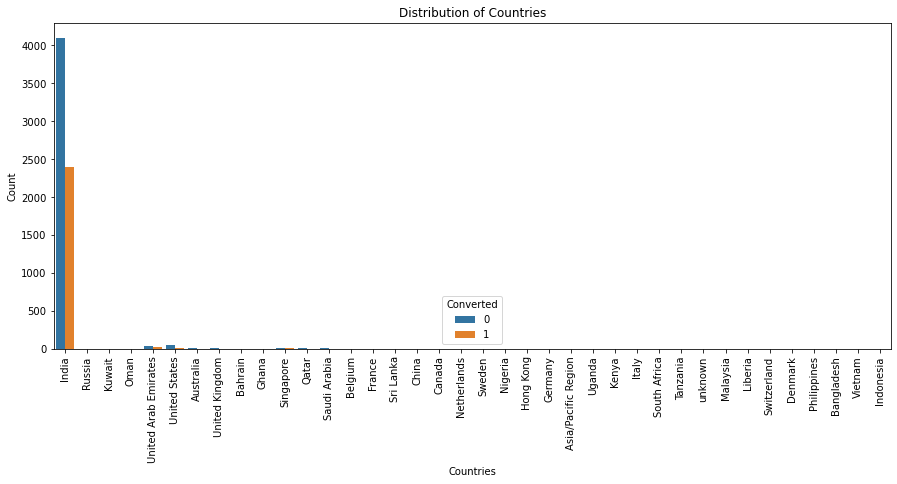

In [35]:
#Visualising the column Country
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Country"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Countries")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.show()

**Here we can see that the value of India is way too high as compared to other countries hence this column may be dropped.**

In [36]:
#Dropping country
lead=lead.drop("Country",1)

### Visualising the count of Specialization column before imputation

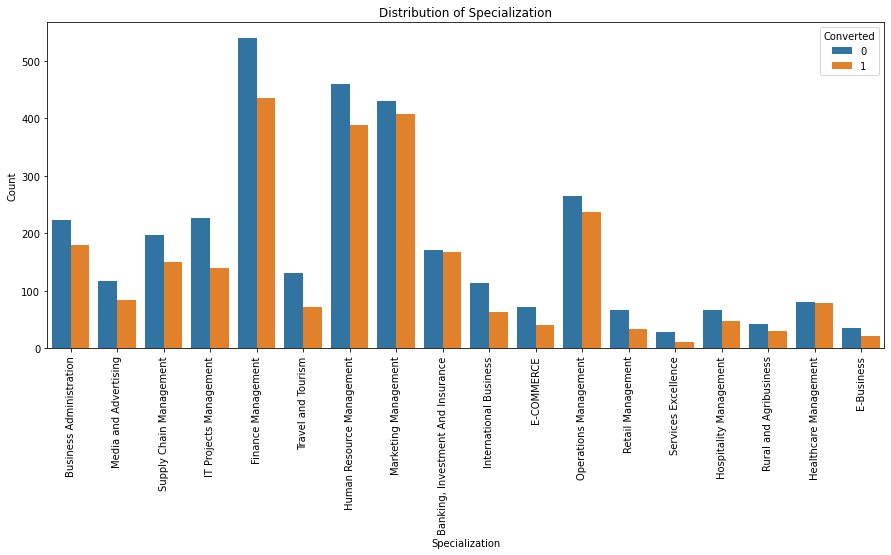

In [37]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Specialization"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Specialization")
plt.xlabel("Specialization")
plt.ylabel("Count")
plt.show()

**Inferences Drawn:**
1. The maximum converted cases are from those customers who have Finance Management as their specialization.
2. The Marketing Management, Human Resource Management, Operations Management, Business Administration and Banking, Investment And Insurance have high ratio of conversion. Hence sales team should focus on the customers specializing from these fields.

In [38]:
#Checking the count in percentage
100*lead["Specialization"].value_counts(normalize=True,dropna=False)

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

**Here the specialisation might not be specified hence there are missing values. We can replace the missing values with Not Mentioned since the value of missing values is high and imputing won't be a good option.**

In [39]:
#Checking the count in numbers
lead["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [40]:
#Checking how many converted cases are there in the column Specialization
lead.groupby("Specialization")["Converted"].sum().sort_values(ascending=False)

Specialization
Finance Management                   436
Marketing Management                 408
Human Resource Management            388
Operations Management                238
Business Administration              179
Banking, Investment And Insurance    167
Supply Chain Management              151
IT Projects Management               140
Media and Advertising                 85
Healthcare Management                 79
Travel and Tourism                    72
International Business                64
Hospitality Management                48
E-COMMERCE                            40
Retail Management                     34
Rural and Agribusiness                31
E-Business                            21
Services Excellence                   11
Name: Converted, dtype: int64

**Here we won't collate any values because we see that the values converted are okay enough to be kept for further analysis.**

In [41]:
#Filling missing values with mode
lead["Specialization"]=lead["Specialization"].fillna(value="Not Mentioned")

#### Visualising the count of Specialization column after imputation

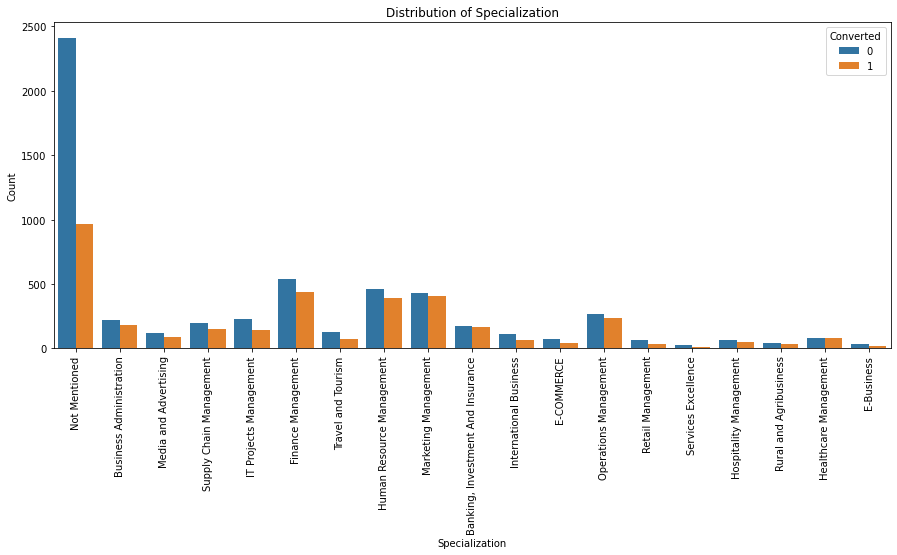

In [42]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Specialization"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Specialization")
plt.xlabel("Specialization")
plt.ylabel("Count")
plt.show()

### Visualising the What is your current occupation column before imputing

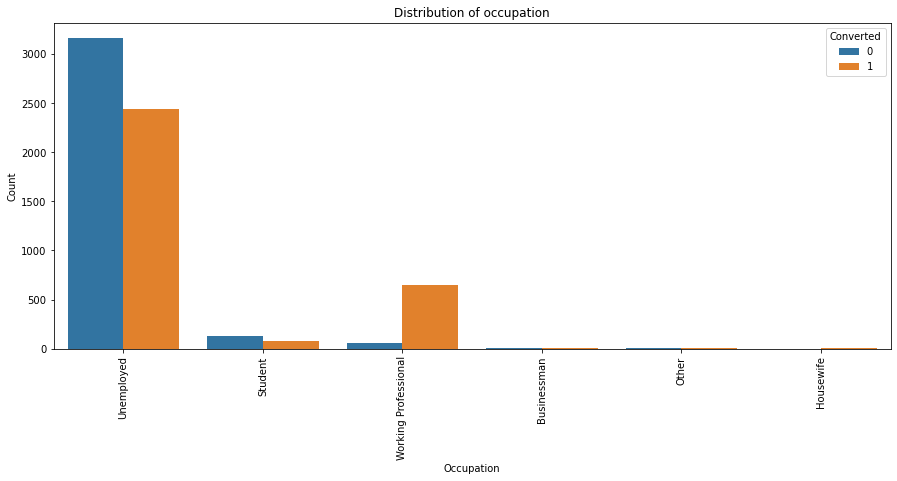

In [43]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["What is your current occupation"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

**Inferences Drawn:**
1. Maximum number of converted cases are from the occupation Unemployed followed by Working Professional.

In [44]:
#Checking the % of value counts
100*lead["What is your current occupation"].value_counts(normalize=True,dropna=False)

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

**Here also since the missing values percentage is less, we can impute the missing value to the highest occuring value.**

In [45]:
#Imputing the missing values in this column
lead["What is your current occupation"]=lead["What is your current occupation"].fillna(value="Unemployed")

#### Visualising the What is your current occupation column after imputing

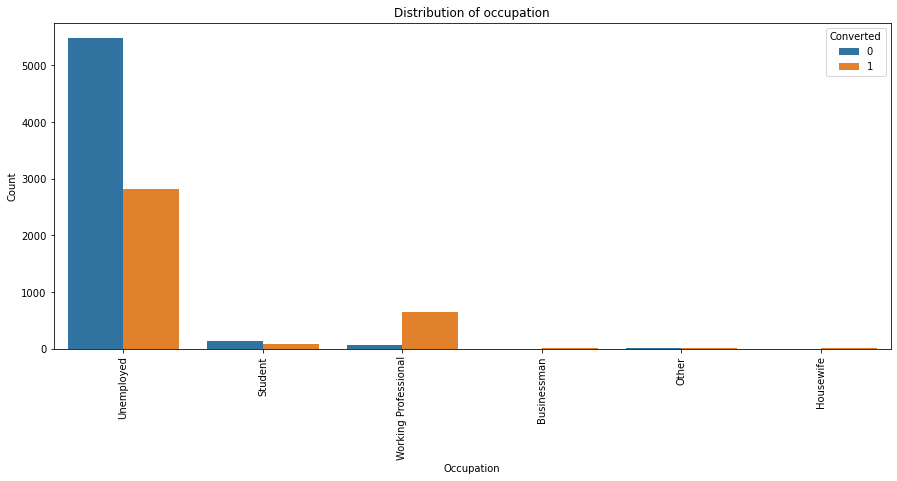

In [46]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["What is your current occupation"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

**Inferences Drawn:**
1. Max no of converted cases are unemployed followed by Working Professional.
2. Rest of the occupations don't contribute much in lead conversion.

### Visualising the What matters most to you in choosing a course column before imputing

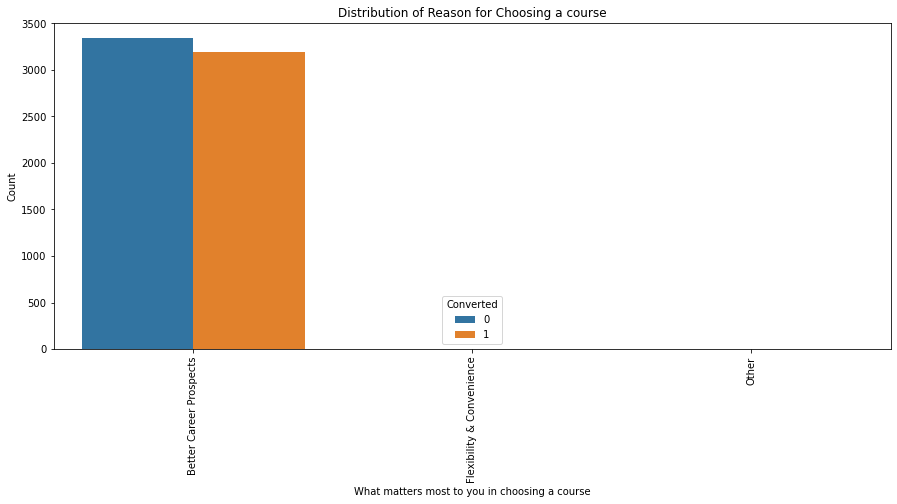

In [47]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["What matters most to you in choosing a course"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Reason for Choosing a course")
plt.xlabel("What matters most to you in choosing a course")
plt.ylabel("Count")
plt.show()

**Inferences Drawn:**
1. All the cases are fron Better Career Prospects.

In [48]:
#Checking the % of value counts
100*lead["What matters most to you in choosing a course"].value_counts(normalize=True,dropna=False)

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

**Here also since the missing values percentage is less, we can impute the missing value to the highest occuring value.**

In [49]:
#Imputing the missing values
lead["What matters most to you in choosing a course"]=lead["What matters most to you in choosing a course"].fillna(
    value="Better Career Prospects")

#### Visualising the What matters most to you in choosing a course column after imputing

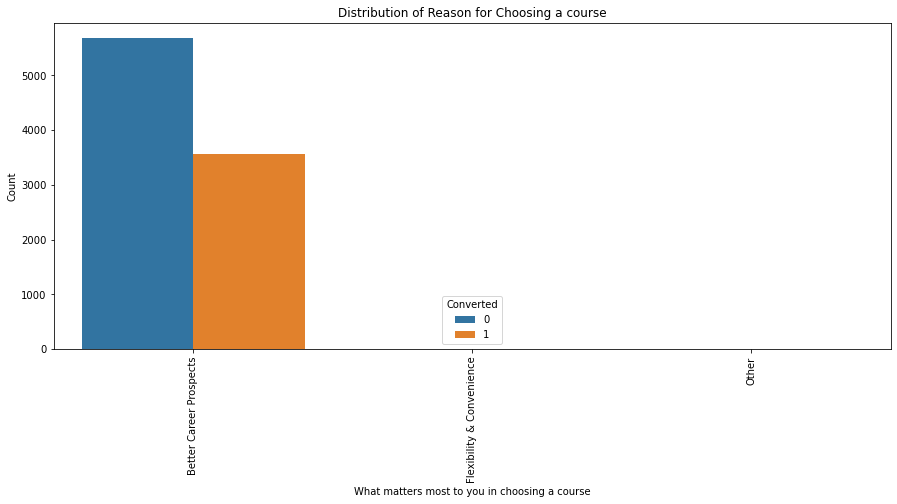

In [50]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["What matters most to you in choosing a course"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Reason for Choosing a course")
plt.xlabel("What matters most to you in choosing a course")
plt.ylabel("Count")
plt.show()

### Visualising Tags column before imputing

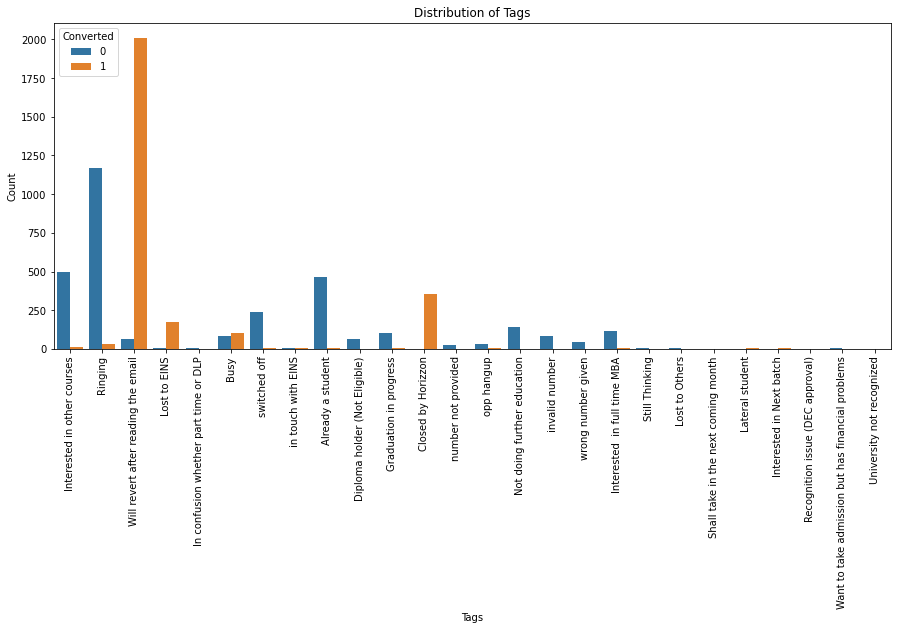

In [51]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Tags"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Tags")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.show()

**Inferences Drawn:**
1. The max number of converted cases are from Will revert after reading the email. The conversion ratio is high. More are converted cases than non converted.
2. Same goes with tags like closed by horizon, Lost to EINS
3. Busy tag has a balance in converted and non converted cases.
4. Rest all the others either have high non converted cases or very less value counts.

In [52]:
#Checking % of value counts in this column
100*lead["Tags"].value_counts(normalize=True,dropna=False)

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

**Here also, the tag might not be specified hence there are missing values. We can replace the missing values with Not Mentioned since the value of missing values is high and imputing won't be a good option.**

In [53]:
#Checking the count in numbers
lead["Tags"].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [54]:
#Checking how many converted cases are there in the column Tags
lead.groupby("Tags")["Converted"].sum().sort_values(ascending=False)

Tags
Will revert after reading the email                  2007
Closed by Horizzon                                    356
Lost to EINS                                          171
Busy                                                  105
Ringing                                                34
Interested in other courses                            13
Graduation in progress                                  7
Interested in Next batch                                5
switched off                                            4
Already a student                                       3
Interested  in full time MBA                            3
Lateral student                                         3
in touch with EINS                                      3
opp hangup                                              3
Want to take admission but has financial problems       2
In confusion whether part time or DLP                   1
Diploma holder (Not Eligible)                           1
Not doing

**As we can see that there are entries with very less converted cases. Hence we will collate all those entries into one.**

In [55]:
#Replacing missing values with Not Mentioned and collating all the low converted values in one signle entry.
lead["Tags"]=lead["Tags"].fillna(value="Not Mentioned")
lead["Tags"]=lead["Tags"].replace(["Lost to Others","Recognition issue (DEC approval)","University not recognized",
                                   "number not provided","wrong number given","Interested in other courses",
                                  "Graduation in progress","Interested in Next batch","switched off",
                                  "Already a student","Interested  in full time MBA","Lateral student",
                                  "in touch with EINS","opp hangup","Want to take admission but has financial problems",
                                  "In confusion whether part time or DLP","Diploma holder (Not Eligible)",
                                  "Not doing further education","Shall take in the next coming month","Still Thinking",
                                  "invalid number","Ringing"],"Other Tags")

In [56]:
#Checking the count in numbers again
lead["Tags"].value_counts(dropna=False)

Not Mentioned                          3353
Other Tags                             3096
Will revert after reading the email    2072
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [57]:
#Checking how many converted cases are there in the column Tags again
lead.groupby("Tags")["Converted"].sum().sort_values(ascending=False)

Tags
Will revert after reading the email    2007
Not Mentioned                           836
Closed by Horizzon                      356
Lost to EINS                            171
Busy                                    105
Other Tags                               86
Name: Converted, dtype: int64

#### Visualising Tags column after imputing

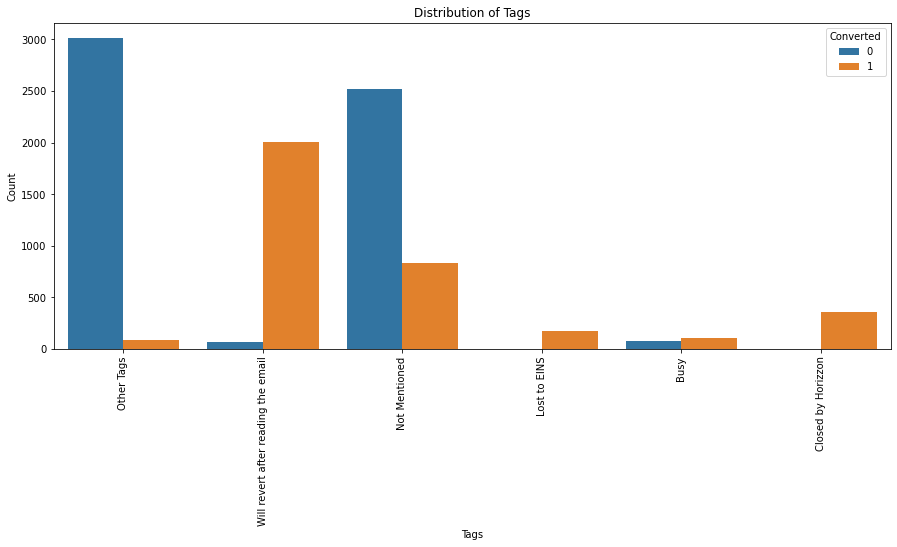

In [58]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Tags"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Tags")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.show()

#### Visualising City column before imputing

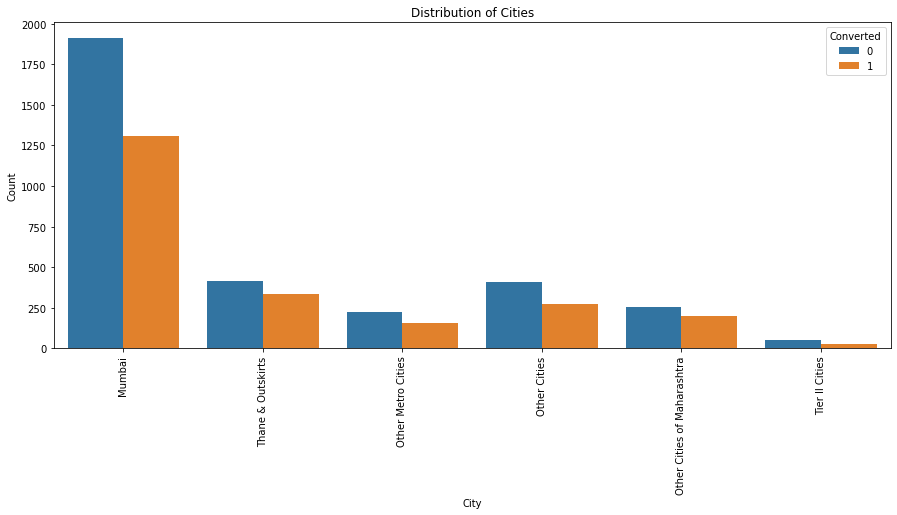

In [59]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["City"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

**Inferences Drawn:**
1. Majority of the cases are from Mumbai.
2. Thane & Outskirts and other cities of Maharashtra have good ratio of converted cases.

In [60]:
100*lead["City"].value_counts(normalize=True,dropna=False)

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

**Here the missing value percentage is high but the difference between missing values and the highest occuring non missing value is less, hence we can impute the value of it to the missing values.**

In [61]:
lead["City"]=lead["City"].fillna(value="Mumbai")

#### Visualising City column after imputing

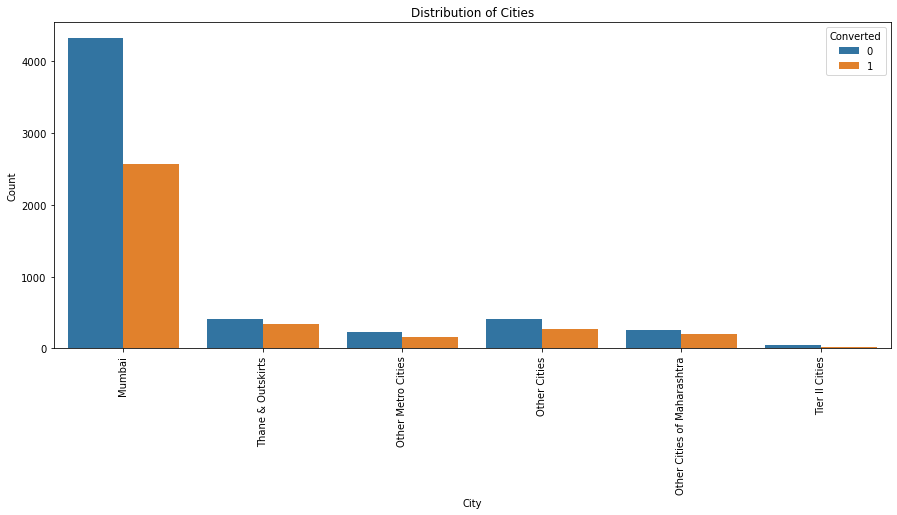

In [62]:
plt.figure(figsize=[15,6])
sns.countplot(x=lead["City"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

In [63]:
#Checking for updated missing values percentage
100*round(lead.isnull().sum()/len(lead),4)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### Visualising other Columns

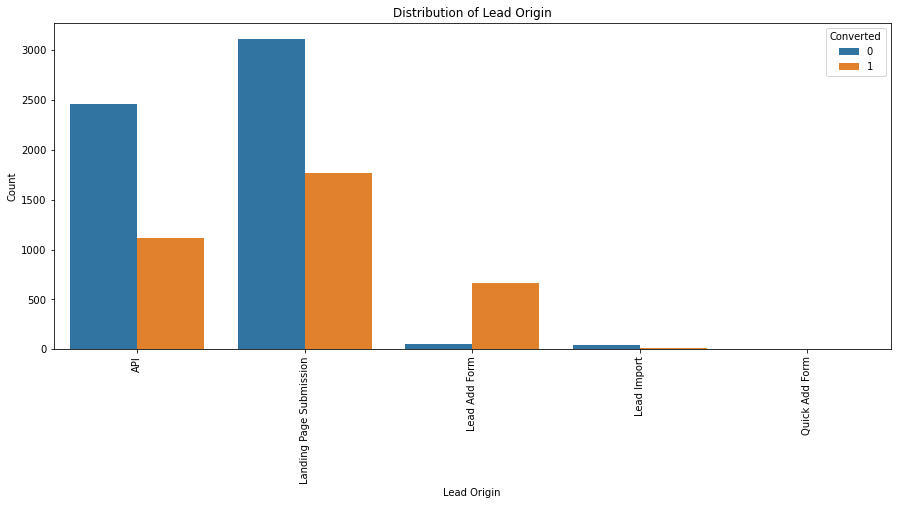

In [64]:
#Lead Origin
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Lead Origin"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Lead Origin")
plt.xlabel("Lead Origin")
plt.ylabel("Count")
plt.show()

**Inferences Drawn:**
1. APi and landing page submission have max contribution.

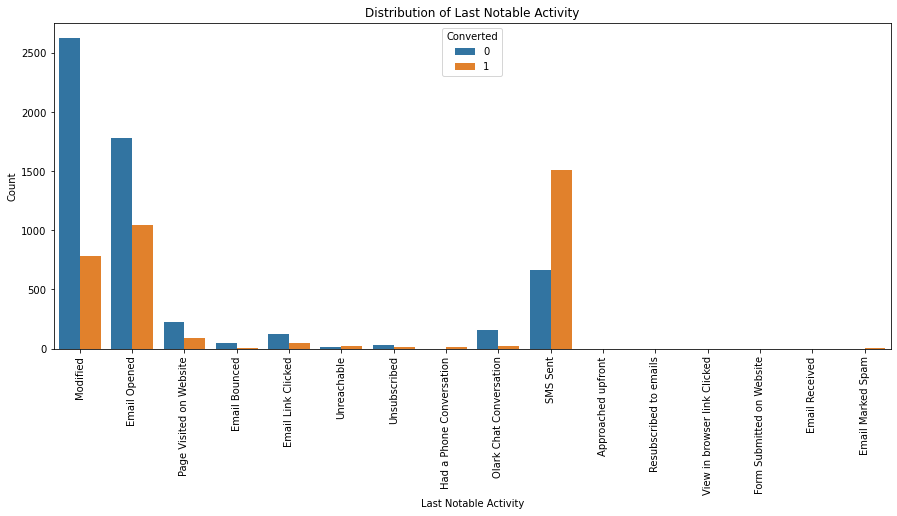

In [65]:
#Last Notable Activity
plt.figure(figsize=[15,6])
sns.countplot(x=lead["Last Notable Activity"],hue=lead.Converted)
plt.xticks(rotation=90)
plt.title("Distribution of Last Notable Activity")
plt.xlabel("Last Notable Activity")
plt.ylabel("Count")
plt.show()

**Inferences Drawn:**
1. SMS Sent has max number of converted cases. It has more converted than the non converted.
2. Both Modified and Email Opened have significant contribution.

In [66]:
#Checking the count of values for each of the values in this column
lead["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [67]:
#Checking for the number of converted cases for each of the values in this column
lead.groupby("Last Notable Activity")["Converted"].sum().sort_values(ascending=False)

Last Notable Activity
SMS Sent                        1508
Email Opened                    1044
Modified                         783
Page Visited on Website           93
Email Link Clicked                45
Olark Chat Conversation           25
Unreachable                       22
Unsubscribed                      14
Had a Phone Conversation          13
Email Bounced                      9
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
View in browser link Clicked       0
Form Submitted on Website          0
Name: Converted, dtype: int64

**We can see that there are converted cases are very less in some of the entries. Hence collating them would be the right thing to do.**

In [68]:
#Collating some of the entries which have low conversion rate
lead["Last Notable Activity"]=lead["Last Notable Activity"].replace(["Email Marked Spam","Resubscribed to emails",
                                                                     "Email Received","Approached upfront",
                                                                     "View in browser link Clicked","Form Submitted on Website"]
                                                                    ,"Other Notable Activities")

In [69]:
#Checking the count of values for each of the values in this column again
lead["Last Notable Activity"].value_counts()

Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Other Notable Activities       7
Name: Last Notable Activity, dtype: int64

In [70]:
#Checking for the number of converted cases for each of the values in this column again
lead.groupby("Last Notable Activity")["Converted"].sum().sort_values(ascending=False)

Last Notable Activity
SMS Sent                    1508
Email Opened                1044
Modified                     783
Page Visited on Website       93
Email Link Clicked            45
Olark Chat Conversation       25
Unreachable                   22
Unsubscribed                  14
Had a Phone Conversation      13
Email Bounced                  9
Other Notable Activities       5
Name: Converted, dtype: int64

**Checking for variables where there is only single unique value so that those can be dropped.**

In [71]:
100*lead["Newspaper Article"].value_counts(normalize=True)

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [72]:
100*lead["X Education Forums"].value_counts(normalize=True)

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [73]:
100*lead["Newspaper"].value_counts(normalize=True)

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [74]:
100*lead["Digital Advertisement"].value_counts(normalize=True)

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [75]:
100*lead["Through Recommendations"].value_counts(normalize=True)

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [76]:
100*lead["What matters most to you in choosing a course"].value_counts(normalize=True)

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [77]:
100*lead.Magazine.value_counts(normalize=True)

No    100.0
Name: Magazine, dtype: float64

In [78]:
100*lead["Update me on Supply Chain Content"].value_counts(normalize=True)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [79]:
100*lead["Get updates on DM Content"].value_counts(normalize=True)

No    100.0
Name: Get updates on DM Content, dtype: float64

In [80]:
100*lead["I agree to pay the amount through cheque"].value_counts(normalize=True)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [81]:
100*lead['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [82]:
100*lead["Search"].value_counts(normalize=True)

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [83]:
100*lead["Do Not Call"].value_counts(normalize=True)

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

**We see that these columns have only one major category of values, hence dropping them is recommended as they will bring class imbalance in the model.**

In [84]:
lead= lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
                 'Get updates on DM Content','Update me on Supply Chain Content',"Do Not Call","Search",
                 "Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations",
                "What matters most to you in choosing a course"],axis=1)

# Numerical Variables Analysis

In [85]:
#Checking the datatype for each numeriacl column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9240 non-null   object
 1   Lead Source                             9240 non-null   object
 2   Do Not Email                            9240 non-null   object
 3   Converted                               9240 non-null   int64 
 4   TotalVisits                             9240 non-null   object
 5   Total Time Spent on Website             9240 non-null   int64 
 6   Page Views Per Visit                    9240 non-null   object
 7   Last Activity                           9240 non-null   object
 8   Specialization                          9240 non-null   object
 9   What is your current occupation         9240 non-null   object
 10  Tags                                    9240 non-null   object
 11  City

### Converting the columns which are numeric to numeric datatypes

In [86]:
lead["TotalVisits"]=lead["TotalVisits"].astype("float")

In [87]:
lead["Page Views Per Visit"]=lead["Page Views Per Visit"].astype("float")

In [88]:
#Checking the datatypes of each column again
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

# Outlier Analysis

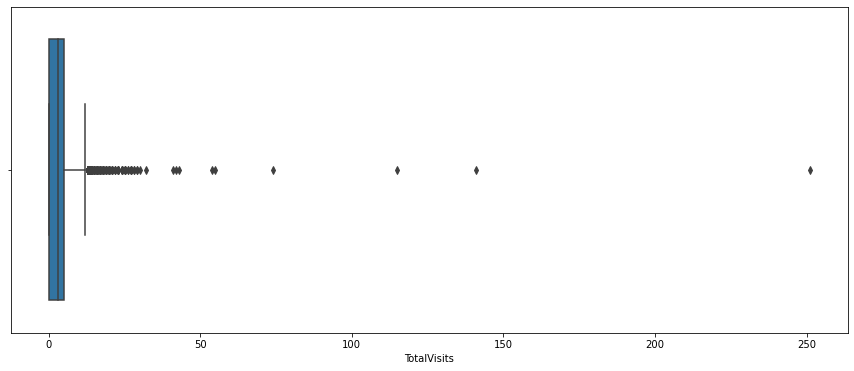

In [89]:
#PLotting boxplot to check for outliers in TotalVisits column
plt.figure(figsize=[15,6])
sns.boxplot(x=lead["TotalVisits"])
plt.show()

**Hence there are outliers in this variable.**  
**We see that after 17 TotalVisits, the values are spaced out, hence we will take values only till 17-17.5.**

In [90]:
#Checking the percentiles in the TotalVisits column
lead["TotalVisits"].describe(percentiles=[0.05,0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [91]:
#Removing  oultier values in TotalVisits column.
Q1 = lead.TotalVisits.quantile(0.05)
Q3 = lead.TotalVisits.quantile(0.90)
IQR = Q3 - Q1
lead = lead[(lead.TotalVisits >= Q1 - 1.5*IQR) & (lead.TotalVisits <= Q3 + 1.5*IQR)]

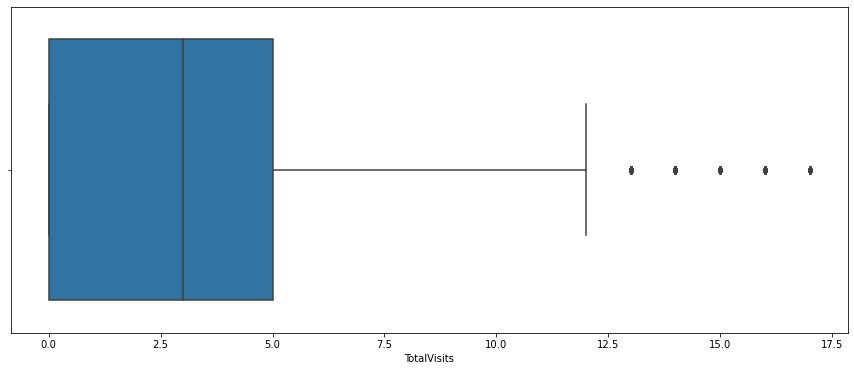

In [92]:
#PLotting the boxplot after removing outliers
plt.figure(figsize=[15,6])
sns.boxplot(x=lead["TotalVisits"])
plt.show()

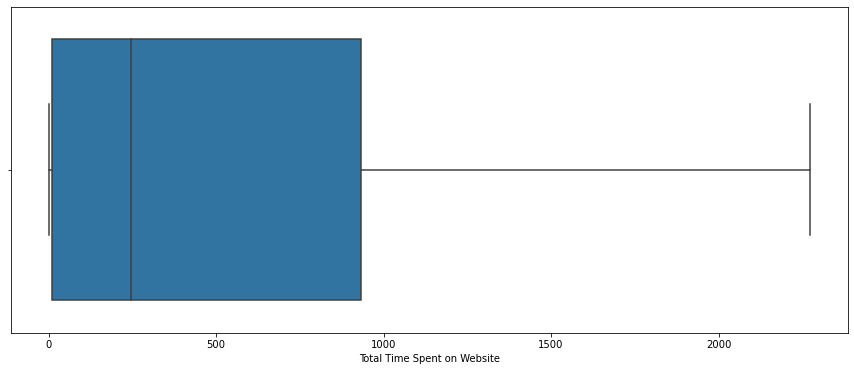

In [93]:
#PLotting boxplot to check for outliers in Total Time Spent on Website column
plt.figure(figsize=[15,6])
sns.boxplot(x=lead["Total Time Spent on Website"])
plt.show()

**There are no outliers in this variable.**

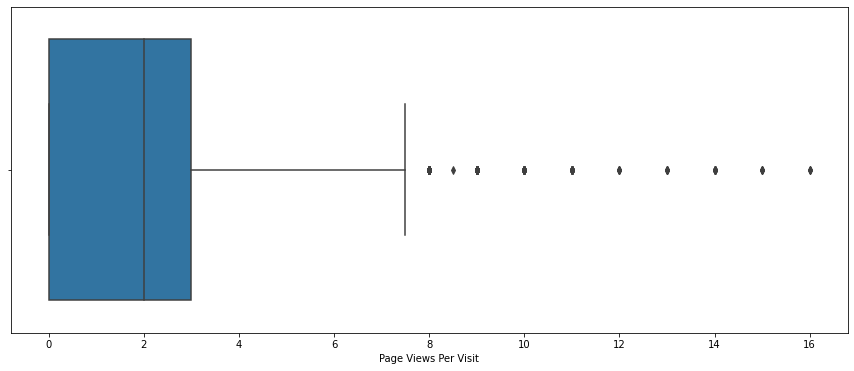

In [94]:
#Checking the percentiles in the Page Views Per Visit column
plt.figure(figsize=[15,6])
sns.boxplot(x=lead["Page Views Per Visit"])
plt.show()

**There are outliers in this variable as well.**   
**We see that after 9 Page Views Per Visit, the values are spaced out. Hence we will take values only till 9.**

In [95]:
#Checking the percentiles in the Page Views Per Visit column
lead["Page Views Per Visit"].describe(percentiles=[0.05,0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9157.000000
mean        2.302302
std         2.066450
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [96]:
#Removing Outliers 5% of the lower value and 1% of the upper  oultier values in Page Views Per Visit column.
Q1 = lead["Page Views Per Visit"].quantile(0.05)
Q3 = lead["Page Views Per Visit"].quantile(0.99)
lead = lead[(lead["Page Views Per Visit"] >= Q1 ) & (lead["Page Views Per Visit"] <= Q3 )]

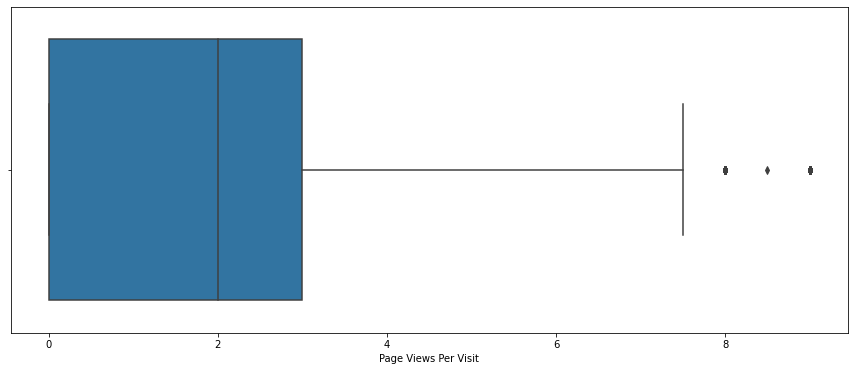

In [97]:
#PLotting the boxplot after removing outliers
plt.figure(figsize=[15,6])
sns.boxplot(x=lead["Page Views Per Visit"])
plt.show()

# Bivariate Analysis of the above variables after Outlier Treatment

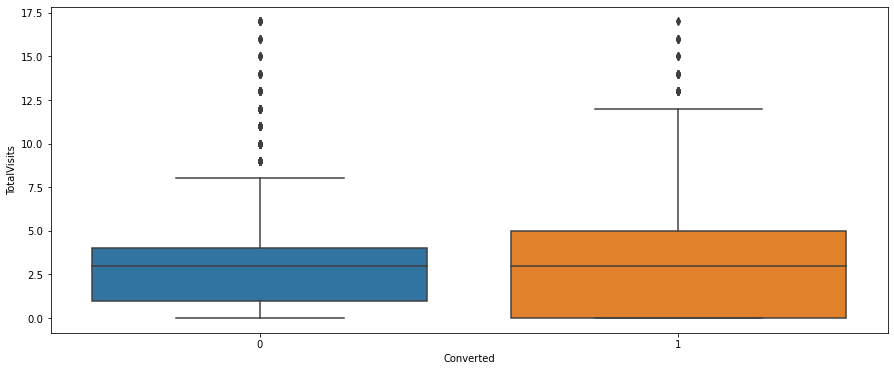

In [98]:
#PLotting boxplot of TotalVisits vs Converted
plt.figure(figsize=[15,6])
sns.boxplot(x=lead.Converted,y=lead.TotalVisits)
plt.show()

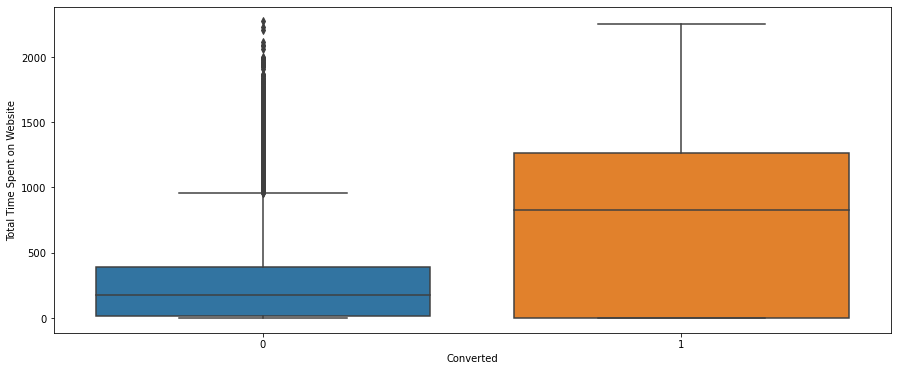

In [99]:
#PLotting boxplot of Total Time Spent on Website vs Converted
plt.figure(figsize=[15,6])
sns.boxplot(x=lead.Converted,y=lead["Total Time Spent on Website"])
plt.show()

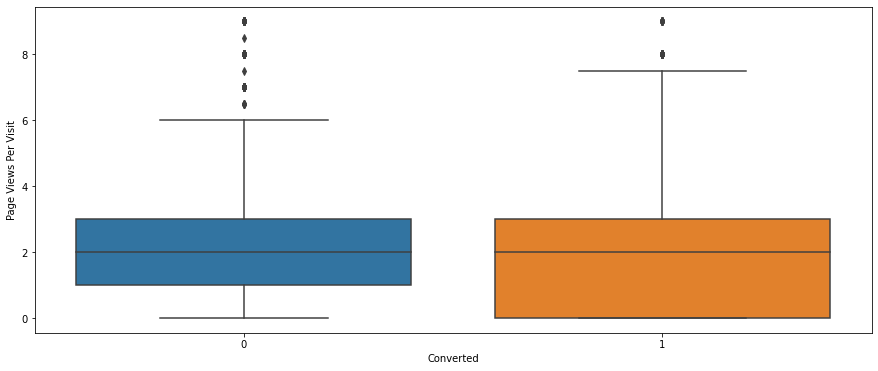

In [100]:
#PLotting boxplot of Page Views Per Visit vs Converted
plt.figure(figsize=[15,6])
sns.boxplot(x=lead.Converted,y=lead["Page Views Per Visit"])
plt.show()

**Hence we can verify that the oultiera have been treated from the data. The reason we don't have any fix % of values that we are eliminating is that we need a trade off between removing outlier values and not removing too much of the data points from the dataframe. It only goes to say that the selected values are very subjective.**

# Multivariate Analysis

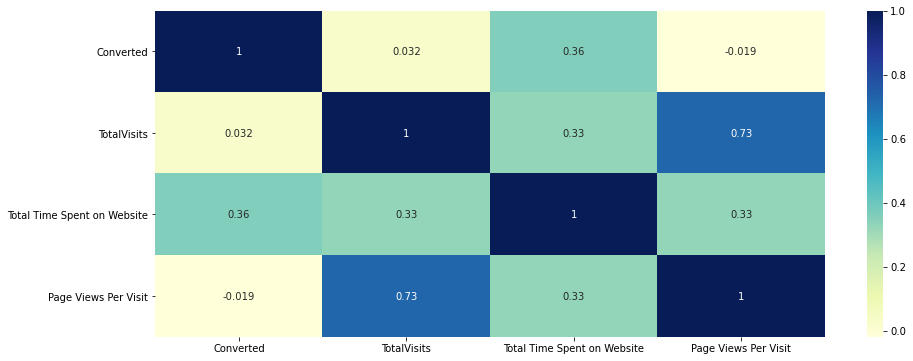

In [101]:
plt.figure(figsize=[15,6])
sns.heatmap(lead.corr(),annot=True,cmap="YlGnBu")
plt.show()

# Data Transformation

### Dummy Variable Creation

In [102]:
#Checking the dataframe.
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,Other Tags,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,Other Tags,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Other Tags,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,Will revert after reading the email,Mumbai,No,Modified


**We see that the columns "Do Not Email" and "A free copy of Mastering The Interview" has values yes and no. Hence before creating dummy variables  we need to convert/map them into numerical variables.**

In [103]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   object 
 1   Lead Source                             9090 non-null   object 
 2   Do Not Email                            9090 non-null   object 
 3   Converted                               9090 non-null   int64  
 4   TotalVisits                             9090 non-null   float64
 5   Total Time Spent on Website             9090 non-null   int64  
 6   Page Views Per Visit                    9090 non-null   float64
 7   Last Activity                           9090 non-null   object 
 8   Specialization                          9090 non-null   object 
 9   What is your current occupation         9090 non-null   object 
 10  Tags                                    9090 non-null   obje

In [104]:
#Mapping variables
lead["Do Not Email"]=lead["Do Not Email"].map({"Yes":1,"No":0})
lead["A free copy of Mastering The Interview"]=lead["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [105]:
# Creating dummy variables for the columns where the first column can be dropped.
lo=pd.get_dummies(lead[["Lead Origin","City","What is your current occupation"]],drop_first=True)
lo.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [106]:
#Creating Dummy Variable for Specialization and dropping the unnecesary column
sp=pd.get_dummies(lead["Specialization"],prefix="Specialization")
sp=sp.drop(["Specialization_Not Mentioned"],1)
sp.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
#Creating Dummy Variable for Lead Source and dropping the unnecesary column
lc=pd.get_dummies(lead["Lead Source"],prefix="Lead Source")
lc=lc.drop(["Lead Source_Other Sources"],1)
lc.head()

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [108]:
#Creating Dummy Variable for Specialization and dropping the unnecesary column
la=pd.get_dummies(lead["Last Activity"],prefix="Last Activity")
la=la.drop(["Last Activity_Other Activities"],1)
la.head()

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0


In [109]:
#Creating Dummy Variable for Tags and dropping the unnecesary column
ta=pd.get_dummies(lead["Tags"],prefix="Tags")
ta=ta.drop(["Tags_Not Mentioned"],1)
ta.head()

,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other Tags,Tags_Will revert after reading the email
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,0,1


In [110]:
#Creating Dummy Variable for Last Notable Activity and dropping the unnecesary column
lan=pd.get_dummies(lead["Last Notable Activity"],prefix="Last Notable Activity")
lan=lan.drop(["Last Notable Activity_Other Notable Activities"],1)
lan.head()

,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [111]:
#Concatenating all the dummy variable dataframes to the main dataframe
lead=pd.concat([lead,lo,sp,lc,la,ta,lan],1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other Tags,Tags_Will revert after reading the email,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,Other Tags,Mumbai,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,Other Tags,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Other Tags,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [112]:
#Dropping the original columns from the master dataframe
lead=lead.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","Tags","City",
               "Last Notable Activity"],1)
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other Tags,Tags_Will revert after reading the email,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


# Data Preparation

### Splitting the data into train and tests data

In [113]:
#Putting the dependent variable ot y
y=lead["Converted"]

In [114]:
#Putting every other varible in X
X=lead.drop(["Converted"],1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other Tags,Tags_Will revert after reading the email,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [115]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler=StandardScaler()
num_cols=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])

In [118]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other Tags,Tags_Will revert after reading the email,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
302,0,1.340545,-0.428736,0.059262,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6087,1,-1.070195,-0.887355,-1.178546,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1033,0,0.651762,-0.025151,1.477695,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7656,1,0.996153,-0.241619,2.008943,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3241,0,0.307371,0.897591,-0.471986,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [119]:
X_train.shape

(6363, 71)

In [120]:
#Checking the Conversion Rate
(sum(y)/len(y))*100

38.448844884488445

**We have conversion Rate of almost 38%**

### Correlation of the variables in the dataset

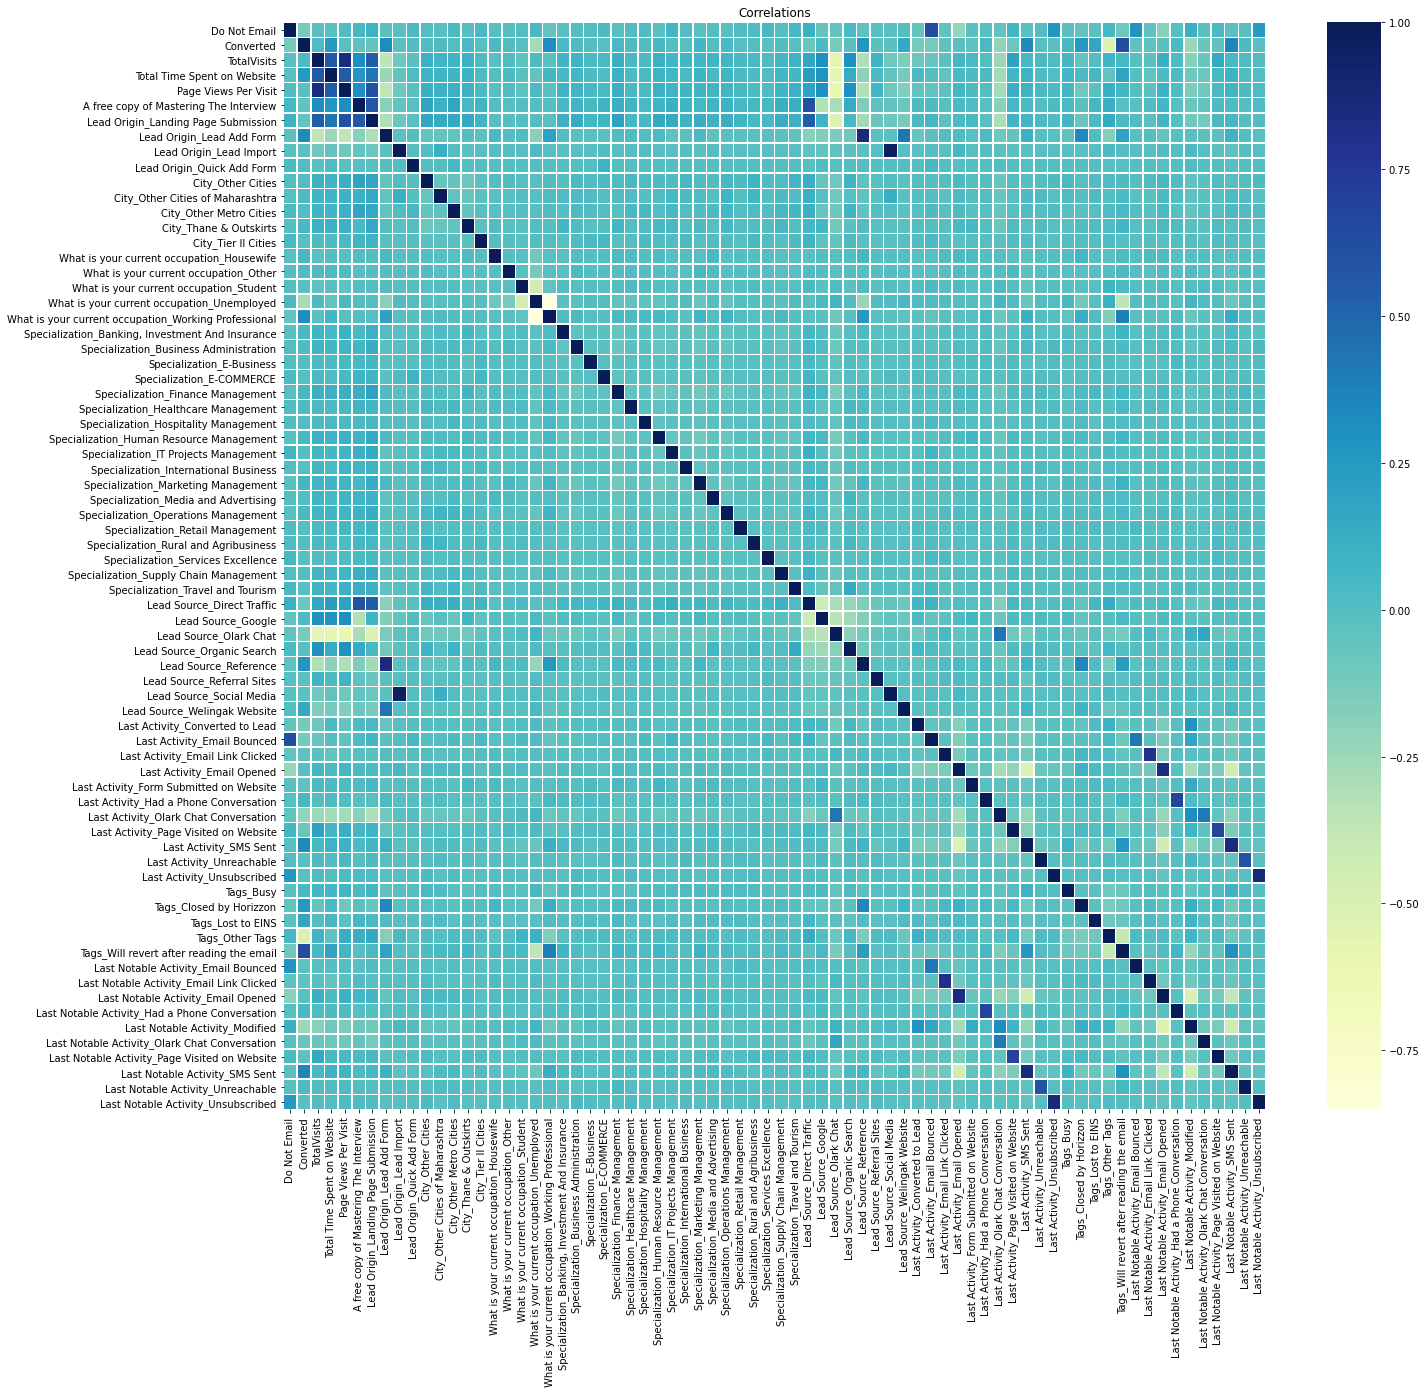

In [121]:
plt.figure(figsize=(22,20))
plt.title("Correlations")
sns.heatmap(lead.corr(method="spearman"),cmap="YlGnBu",linewidths=.5)
plt.show()

# Model Building

In [122]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [123]:
#Running RFE with 20 variables
rfe=RFE(logreg,20)
rfe = rfe.fit(X_train, y_train)

In [124]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False, False])

In [125]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Origin_Quick Add Form', False, 11),
 ('City_Other Cities', False, 26),
 ('City_Other Cities of Maharashtra', False, 51),
 ('City_Other Metro Cities', False, 19),
 ('City_Thane & Outskirts', False, 49),
 ('City_Tier II Cities', False, 12),
 ('What is your current occupation_Housewife', False, 23),
 ('What is your current occupation_Other', False, 28),
 ('What is your current occupation_Student', False, 8),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', False, 42),
 ('Specialization_Banking, Investment And Insurance', False, 37),
 ('Specialization_Business Administration', False, 38),
 ('Spe

In [126]:
#Naming the columns which are inluded in the RFE
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Other Tags',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [127]:
#Listing the columns which are not there in RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Market

### Model 1

In [128]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1212.7
Date:                Sun, 11 Apr 2021   Deviance:                       2425.4
Time:                        14:08:17   Pearson chi2:                 8.35e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4838      0.322     -1.501      0.133      -1.115       0.148
Do Not Email                                     -0.6618      0.272     -2.431      0.015      -1.195      -0.128
Total Time Spent on Website                       1.0800      0.062     17.550      0.000       0.959       1.201
Lead Origin_Landing Page Submission              -0.6489      0.138     -4.700      0.000      -0.919      -0.378
Lead Origin_Lead Add Form                         3.4620      0.995      3.478      0.001       1.511       5.413
What is your current occupation_Unemployed       -0.7856      0.297     -2.646      0.008      -1.367      -0.204
Lead Source_Olark Chat                            0.9208      0.172      5.368      0.000       0.585       1.257
Lead Source_Reference                            -2.5634      1.055     -2.430      0.015      -4.631      -0.496
Lead Source_Welingak Website                      2.6455      1.416      1.868      0.062      -0.130       5.421
Last Activity_Email Bounced                      -1.0419      0.562     -1.855      0.064      -2.143       0.059
Last Activity_Olark Chat Conversation            -0.5278      0.301     -1.752      0.080      -1.118       0.063
Last Activity_SMS Sent                            1.0946      0.250      4.387      0.000       0.606       1.584
Tags_Busy                                         0.6702      0.235      2.853      0.004       0.210       1.131
Tags_Closed by Horizzon                           6.5746      0.742      8.865      0.000       5.121       8.028
Tags_Lost to EINS                                 6.3753      0.736      8.667      0.000       4.934       7.817
Tags_Other Tags                                  -2.8819      0.171    -16.887      0.000      -3.216      -2.547
Tags_Will revert after reading the email          4.2780      0.188     22.718      0.000       3.909       4.647
Last Notable Activity_Email Link Clicked         -1.1072      0.418     -2.651      0.008      -1.926      -0.288
Last Notable Activity_Modified                   -1.2653      0.180     -7.026      0.000      -1.618      -0.912
Last Notable Activity_Olark Chat Conversation    -1.4469      0.521     -2.776      0.005      -2.468      -0.426
Last Notable Activity_SMS Sent                    1.0064      0.281      3.576      0.000       0.455       1.558
=================================================================================================================
"""

In [129]:
#Calculating VIF
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,20.04
6,Lead Source_Reference,15.51
19,Last Notable Activity_SMS Sent,6.66
10,Last Activity_SMS Sent,6.40
7,Lead Source_Welingak Website,5.05
4,What is your current occupation_Unemployed,4.62
2,Lead Origin_Landing Page Submission,3.15
17,Last Notable Activity_Modified,2.85
5,Lead Source_Olark Chat,2.12
9,Last Activity_Olark Chat Conversation,2.12


**We see that the variable Last Activity_Olark Chat Conversation has a high P-Value. Hence we will remove that first.**

In [130]:
col=col.drop("Last Activity_Olark Chat Conversation")

### Model 2

In [131]:
logm2=sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1214.3
Date:                Sun, 11 Apr 2021   Deviance:                       2428.5
Time:                        14:08:17   Pearson chi2:                 8.67e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4713      0.323     -1.459      0.145      -1.105       0.162
Do Not Email                                     -0.6610      0.272     -2.426      0.015      -1.195      -0.127
Total Time Spent on Website                       1.0857      0.062     17.622      0.000       0.965       1.207
Lead Origin_Landing Page Submission              -0.6346      0.138     -4.593      0.000      -0.905      -0.364
Lead Origin_Lead Add Form                         3.5331      1.007      3.509      0.000       1.560       5.506
What is your current occupation_Unemployed       -0.7999      0.298     -2.687      0.007      -1.383      -0.216
Lead Source_Olark Chat                            0.8779      0.170      5.168      0.000       0.545       1.211
Lead Source_Reference                            -2.6097      1.066     -2.448      0.014      -4.700      -0.520
Lead Source_Welingak Website                      2.6053      1.424      1.829      0.067      -0.186       5.396
Last Activity_Email Bounced                      -0.9391      0.560     -1.676      0.094      -2.037       0.159
Last Activity_SMS Sent                            1.2536      0.236      5.320      0.000       0.792       1.715
Tags_Busy                                         0.6770      0.236      2.874      0.004       0.215       1.139
Tags_Closed by Horizzon                           6.6453      0.742      8.951      0.000       5.190       8.100
Tags_Lost to EINS                                 6.4322      0.735      8.745      0.000       4.991       7.874
Tags_Other Tags                                  -2.8850      0.171    -16.868      0.000      -3.220      -2.550
Tags_Will revert after reading the email          4.3092      0.189     22.777      0.000       3.938       4.680
Last Notable Activity_Email Link Clicked         -1.1060      0.422     -2.620      0.009      -1.933      -0.279
Last Notable Activity_Modified                   -1.4334      0.157     -9.154      0.000      -1.740      -1.126
Last Notable Activity_Olark Chat Conversation    -1.9567      0.435     -4.496      0.000      -2.810      -1.104
Last Notable Activity_SMS Sent                    0.8474      0.269      3.151      0.002       0.320       1.375
=================================================================================================================
"""

**We see that the variable Last Activity_Email Bounced has a high P-Value. Hence we will remove that as well.**

In [132]:
col=col.drop("Last Activity_Email Bounced",1)

### Model 3

In [133]:
logm3=sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1215.8
Date:                Sun, 11 Apr 2021   Deviance:                       2431.5
Time:                        14:08:17   Pearson chi2:                 8.72e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4669      0.321     -1.453      0.146      -1.097       0.163
Do Not Email                                     -0.8788      0.246     -3.578      0.000      -1.360      -0.397
Total Time Spent on Website                       1.0801      0.061     17.593      0.000       0.960       1.200
Lead Origin_Landing Page Submission              -0.6413      0.138     -4.647      0.000      -0.912      -0.371
Lead Origin_Lead Add Form                         3.4103      0.972      3.510      0.000       1.506       5.314
What is your current occupation_Unemployed       -0.8020      0.296     -2.710      0.007      -1.382      -0.222
Lead Source_Olark Chat                            0.8740      0.170      5.146      0.000       0.541       1.207
Lead Source_Reference                            -2.4877      1.034     -2.407      0.016      -4.513      -0.462
Lead Source_Welingak Website                      2.7026      1.399      1.931      0.053      -0.040       5.445
Last Activity_SMS Sent                            1.3080      0.234      5.596      0.000       0.850       1.766
Tags_Busy                                         0.6879      0.236      2.917      0.004       0.226       1.150
Tags_Closed by Horizzon                           6.6496      0.743      8.952      0.000       5.194       8.106
Tags_Lost to EINS                                 6.4073      0.734      8.732      0.000       4.969       7.845
Tags_Other Tags                                  -2.8795      0.171    -16.842      0.000      -3.215      -2.544
Tags_Will revert after reading the email          4.3042      0.188     22.848      0.000       3.935       4.673
Last Notable Activity_Email Link Clicked         -1.1039      0.422     -2.618      0.009      -1.930      -0.277
Last Notable Activity_Modified                   -1.4663      0.156     -9.416      0.000      -1.772      -1.161
Last Notable Activity_Olark Chat Conversation    -1.9459      0.435     -4.474      0.000      -2.798      -1.094
Last Notable Activity_SMS Sent                    0.8100      0.268      3.020      0.003       0.284       1.336
=================================================================================================================
"""

**We see that the variable Lead Source_Welingak Website has a high P-Value. Hence we will remove that as well.**

In [134]:
col=col.drop("Lead Source_Welingak Website",1)

### Model 4

In [135]:
logm4=sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1217.9
Date:                Sun, 11 Apr 2021   Deviance:                       2435.7
Time:                        14:08:18   Pearson chi2:                 8.80e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4584      0.322     -1.424      0.154      -1.089       0.172
Do Not Email                                     -0.8859      0.245     -3.617      0.000      -1.366      -0.406
Total Time Spent on Website                       1.0810      0.061     17.595      0.000       0.961       1.201
Lead Origin_Landing Page Submission              -0.6408      0.138     -4.641      0.000      -0.911      -0.370
Lead Origin_Lead Add Form                         5.1088      0.583      8.770      0.000       3.967       6.251
What is your current occupation_Unemployed       -0.8053      0.296     -2.717      0.007      -1.386      -0.224
Lead Source_Olark Chat                            0.8749      0.170      5.148      0.000       0.542       1.208
Lead Source_Reference                            -4.1836      0.684     -6.117      0.000      -5.524      -2.843
Last Activity_SMS Sent                            1.3212      0.233      5.659      0.000       0.864       1.779
Tags_Busy                                         0.6852      0.236      2.905      0.004       0.223       1.148
Tags_Closed by Horizzon                           6.6547      0.743      8.957      0.000       5.199       8.111
Tags_Lost to EINS                                 6.4129      0.734      8.738      0.000       4.974       7.851
Tags_Other Tags                                  -2.8936      0.171    -16.890      0.000      -3.229      -2.558
Tags_Will revert after reading the email          4.3035      0.189     22.817      0.000       3.934       4.673
Last Notable Activity_Email Link Clicked         -1.0948      0.419     -2.616      0.009      -1.915      -0.274
Last Notable Activity_Modified                   -1.4815      0.156     -9.522      0.000      -1.786      -1.177
Last Notable Activity_Olark Chat Conversation    -1.9513      0.435     -4.486      0.000      -2.804      -1.099
Last Notable Activity_SMS Sent                    0.7942      0.268      2.965      0.003       0.269       1.319
=================================================================================================================
"""

**We see that the P-Values are below 5%. Hence dropping them on the basis of P-Values is not needed.**

In [136]:
#Calculating VIF
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
16,Last Notable Activity_SMS Sent,6.28
7,Last Activity_SMS Sent,5.90
4,What is your current occupation_Unemployed,4.62
3,Lead Origin_Lead Add Form,4.41
6,Lead Source_Reference,4.09
2,Lead Origin_Landing Page Submission,3.13
14,Last Notable Activity_Modified,2.24
5,Lead Source_Olark Chat,1.98
11,Tags_Other Tags,1.88
12,Tags_Will revert after reading the email,1.87


**We see that Last Notable Activity_SMS Sent has VIF Value more than 5, hence dropping it.**

In [137]:
col=col.drop("Last Notable Activity_SMS Sent")

### Model 5

In [138]:
logm5=sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1222.3
Date:                Sun, 11 Apr 2021   Deviance:                       2444.7
Time:                        14:08:18   Pearson chi2:                 9.05e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3948      0.320     -1.235      0.217      -1.021       0.232
Do Not Email                                     -0.8538      0.244     -3.500      0.000      -1.332      -0.376
Total Time Spent on Website                       1.0741      0.061     17.598      0.000       0.954       1.194
Lead Origin_Landing Page Submission              -0.6492      0.137     -4.735      0.000      -0.918      -0.380
Lead Origin_Lead Add Form                         5.1234      0.588      8.711      0.000       3.971       6.276
What is your current occupation_Unemployed       -0.8110      0.295     -2.747      0.006      -1.390      -0.232
Lead Source_Olark Chat                            0.8987      0.169      5.313      0.000       0.567       1.230
Lead Source_Reference                            -4.2229      0.692     -6.101      0.000      -5.579      -2.866
Last Activity_SMS Sent                            1.9183      0.118     16.298      0.000       1.688       2.149
Tags_Busy                                         0.7215      0.233      3.097      0.002       0.265       1.178
Tags_Closed by Horizzon                           6.8189      0.744      9.167      0.000       5.361       8.277
Tags_Lost to EINS                                 6.5588      0.735      8.922      0.000       5.118       8.000
Tags_Other Tags                                  -2.8157      0.167    -16.846      0.000      -3.143      -2.488
Tags_Will revert after reading the email          4.3712      0.191     22.945      0.000       3.998       4.745
Last Notable Activity_Email Link Clicked         -1.1885      0.420     -2.828      0.005      -2.012      -0.365
Last Notable Activity_Modified                   -1.7613      0.129    -13.669      0.000      -2.014      -1.509
Last Notable Activity_Olark Chat Conversation    -2.0379      0.435     -4.680      0.000      -2.891      -1.184
=================================================================================================================
"""

In [139]:
#Calculating VIF
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
4,What is your current occupation_Unemployed,4.56
3,Lead Origin_Lead Add Form,4.41
6,Lead Source_Reference,4.09
2,Lead Origin_Landing Page Submission,3.13
5,Lead Source_Olark Chat,1.96
11,Tags_Other Tags,1.85
12,Tags_Will revert after reading the email,1.83
14,Last Notable Activity_Modified,1.77
7,Last Activity_SMS Sent,1.63
1,Total Time Spent on Website,1.40


**Hence we see that the P-Values is less than 5% and the VIF values are less than 5-10. Hence this is our final model.**

In [140]:
#Predicting values on the train data
y_train_pred=res.predict(sm.add_constant(X_train[col]))
y_train_pred.head()

302     0.158918
6087    0.020327
1033    0.225690
7656    0.020518
3241    0.995498
dtype: float64

In [141]:
#Creating a dataframe and indexing the dataframe
y_train_pred_final=pd.DataFrame({"Converted":y_train.values,"Conv_prob":y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_prob,Prospect ID
302,0,0.158918,302
6087,0,0.020327,6087
1033,0,0.225690,1033
7656,0,0.020518,7656
3241,1,0.995498,3241


In [142]:
#Adding a row to predict the values according to the model
y_train_pred_final['Predicted'] = y_train_pred_final.Conv_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_prob,Prospect ID,Predicted
302,0,0.158918,302,0
6087,0,0.020327,6087,0
1033,0,0.225690,1033,0
7656,0,0.020518,7656,0
3241,1,0.995498,3241,1


# Printing Accuracy of the model

In [143]:
from sklearn import metrics
#Printing Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9281785321389282


In [144]:
#Printing the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3767  168]
 [ 289 2139]]


In [145]:
TP=confusion[1,1] #True Positive
TN=confusion[0,0] #True Negative
FN=confusion[1,0] #False Negative
FP=confusion[0,1] #False Positive

In [146]:
#Sensitivity
TP/float(TP+FN)

0.8809719934102141

In [147]:
#Specificity
TN/float(TN+FP)

0.9573062261753494

In [148]:
#Positivity Predictive Value
TP/float(TP+FP)

0.9271781534460338

In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9287475345167653


In [150]:
#False Positive Rate
FP/float(FP+TN)

0.042693773824650574

In [151]:
#True Positive Rate
TP/float(TP+FN)

0.8809719934102141

In [152]:
#Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

<Figure size 720x360 with 0 Axes>

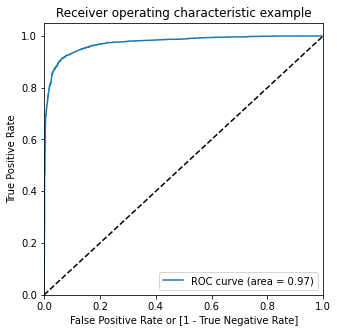

In [310]:
#Calling the ROC Function
plt.figure(figsize=(10,5))
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conv_prob)

**Area under the curve is 0.97 which is a good indication of the predictive power of the model.**

# Finding Optimal Cut off Point

In [154]:
#Creating columns of different cut off probability
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Conv_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conv_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
302,0,0.158918,302,0,1,1,0,0,0,0,0,0,0,0
6087,0,0.020327,6087,0,1,0,0,0,0,0,0,0,0,0
1033,0,0.225690,1033,0,1,1,1,0,0,0,0,0,0,0
7656,0,0.020518,7656,0,1,0,0,0,0,0,0,0,0,0
3241,1,0.995498,3241,1,1,1,1,1,1,1,1,1,1,1


In [155]:
#Calculating Accuracy, Sensitivity and Specificity
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.850699  0.974053  0.774587
0.2   0.2  0.897375  0.949753  0.865057
0.3   0.3  0.923621  0.919275  0.926302
0.4   0.4  0.927707  0.903624  0.942567
0.5   0.5  0.928179  0.880972  0.957306
0.6   0.6  0.927393  0.861203  0.968234
0.7   0.7  0.915292  0.812603  0.978653
0.8   0.8  0.907748  0.783773  0.984244
0.9   0.9  0.890460  0.727759  0.990851


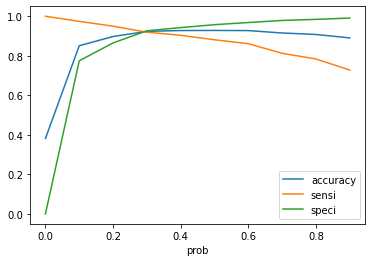

In [156]:
#Plotting accuracy,sensitivity and specificity for different probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**The cutt off point will be somewhere 0.3 since that is the intersection point. We can consider 0.3 as the optimum cutoff probability.**

In [157]:
#From the above curve, 0.3 is the optimum cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Conv_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conv_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
302,0,0.158918,302,0,1,1,0,0,0,0,0,0,0,0,0
6087,0,0.020327,6087,0,1,0,0,0,0,0,0,0,0,0,0
1033,0,0.225690,1033,0,1,1,1,0,0,0,0,0,0,0,0
7656,0,0.020518,7656,0,1,0,0,0,0,0,0,0,0,0,0
3241,1,0.995498,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [158]:
#Calculating Lead Score in this dataframe
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conv_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conv_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
302,0,0.158918,302,0,1,1,0,0,0,0,0,0,0,0,0,16
6087,0,0.020327,6087,0,1,0,0,0,0,0,0,0,0,0,0,2
1033,0,0.225690,1033,0,1,1,1,0,0,0,0,0,0,0,0,23
7656,0,0.020518,7656,0,1,0,0,0,0,0,0,0,0,0,0,2
3241,1,0.995498,3241,1,1,1,1,1,1,1,1,1,1,1,1,100


In [159]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9236209335219236

In [160]:
#Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3645,  290],
       [ 196, 2232]], dtype=int64)

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
#Sensitivity
TP/float(TP+FN)

0.9192751235584844

In [163]:
#Specificity
TN/float(TN+FP)

0.9263024142312579

**Inferences drawn:**
1. The model perfroms well. The AUC Score(Area under the Curve) is 0.97. Ideally it should be 1. This is a great AUC Score.
2. The metrics for train data are:     
    a. Accuracy: 92.36%   
    b. Sensitivity: 91.92%   
    c. Specificity: 92.63%  

### Other Metrics

In [164]:
#Positivity Predictive Value
TP/float(TP+FP)

0.8850118953211736

In [165]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9489716219734444


In [166]:
#False Positive Rate
FP/float(FP+TN)

0.07369758576874205

In [167]:
#True Positive Rate
TP/float(TP+FN)

0.9192751235584844

In [168]:
#Precision
confusion2[1,1]/(confusion2[1,1]+confusion2[0,1])

0.8850118953211736

In [169]:
#Recall
confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])

0.9192751235584844

In [170]:
from sklearn.metrics import precision_recall_curve

In [171]:
p,r,threshold=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Conv_prob)

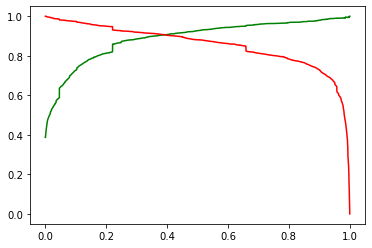

In [172]:
#PLotting Precision-Recall Curve 
plt.plot(threshold,p[:-1],"g-")
plt.plot(threshold,r[:-1],"r-")

# Working on the test set

In [173]:
#Scaling the test data set
num_cols=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [174]:
#Checking the test dataframe
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other Tags,Tags_Will revert after reading the email,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
6906,0,0.307371,1.919395,-0.116050,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1873,0,-0.381412,-0.546142,-0.116050,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
771,0,1.340545,-0.797465,2.540191,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4495,0,0.307371,-0.623190,0.946447,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9061,0,-0.381412,2.392690,-0.116050,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [175]:
#Adding the columns to the test dataset which are there via RFE
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Unemployed,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Other Tags,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
6906,0,1.919395,1,0,1,0,0,1,0,0,0,0,1,0,0,0
1873,0,-0.546142,1,0,1,0,0,1,0,0,0,1,0,0,1,0
771,0,-0.797465,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4495,0,-0.623190,1,0,1,0,0,0,0,0,0,1,0,0,0,0
9061,0,2.392690,1,0,1,0,0,0,0,0,1,0,0,0,1,0


In [176]:
#Adding a constant to this dataframe
X_test_sm=sm.add_constant(X_test)

## Predictions on Test Set

In [177]:
#Prediciting the values with the model built earlier
y_test_pred=res.predict(X_test_sm)

In [178]:
#Checking the values
y_test_pred[:10]

6906    0.998493
1873    0.006058
771     0.007554
4495    0.004772
9061    0.995980
4929    0.161516
2308    0.020832
1034    0.040267
9033    0.003930
7008    0.906259
dtype: float64

In [179]:
#Creating Dataframe
y_pred1=pd.DataFrame(y_test_pred)

In [180]:
#Creating Dataframe
y_test_df=pd.DataFrame(y_test)

In [181]:
#Adding index to test_df
y_test_df['Prospect ID'] = y_test_df.index

In [182]:
#Resetting index for both dataframes
y_pred1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [183]:
#Checking the dataframe
y_test_df.head()

,Converted,Prospect ID
0,1,6906
1,0,1873
2,0,771
3,0,4495
4,1,9061


In [184]:
#Checking the dataframe
y_pred1.head()

,0
0,0.998493
1,0.006058
2,0.007554
3,0.004772
4,0.995980


In [185]:
#Concating the 2 dataframes
y_pred_final = pd.concat([y_test_df, y_pred1],axis=1)

In [186]:
#Checking the final dataframe
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.998493
1,0,1873,0.006058
2,0,771,0.007554
3,0,4495,0.004772
4,1,9061,0.995980


In [187]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [188]:
#Checking the final dataframe
y_pred_final.head()

,Converted,Prospect ID,Conv_Prob
0,1,6906,0.998493
1,0,1873,0.006058
2,0,771,0.007554
3,0,4495,0.004772
4,1,9061,0.995980


In [189]:
#Rearranging the cols
cols=y_pred_final.columns.tolist()
cols=cols[1:2]+cols[0:1]+cols[-1:]
cols

['Prospect ID', 'Converted', 'Conv_Prob']

In [190]:
#Adding it to the dataframe
y_pred_final=y_pred_final[cols]

In [191]:
#Checking the final dataframe
y_pred_final.head()

,Prospect ID,Converted,Conv_Prob
0,6906,1,0.998493
1,1873,0,0.006058
2,771,0,0.007554
3,4495,0,0.004772
4,9061,1,0.995980


In [192]:
#Creating final_perdicted column with optimal cut off probability
y_pred_final["final_predicted"]=y_pred_final.Conv_Prob.map(lambda x: 1 if x>0.3 else 0)

In [193]:
#Checking the final dataframe
y_pred_final.head()

,Prospect ID,Converted,Conv_Prob,final_predicted
0,6906,1,0.998493,1
1,1873,0,0.006058,0
2,771,0,0.007554,0
3,4495,0,0.004772,0
4,9061,1,0.995980,1


In [194]:
#Calculating the accuracy
metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.9255592225889255

In [195]:
#creating the confusion matrix
confusion2=metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
confusion2

array([[1554,  106],
       [  97,  970]], dtype=int64)

In [196]:
TP = confusion2[1,1]
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [197]:
#sensitivity
TP/(TP+FN)

0.9090909090909091

In [198]:
#Specificity
TN/(TN+FP)

0.936144578313253

In [199]:
#Precision Score
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.9014869888475836

In [200]:
#Recall Score
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9090909090909091

In [201]:
#Adding lead score to this final dataframe
y_pred_final['Lead Score']=y_pred_final['Conv_Prob'].apply(lambda x:round(x*100))


y_pred_final.head()

,Prospect ID,Converted,Conv_Prob,final_predicted,Lead Score
0,6906,1,0.998493,1,100
1,1873,0,0.006058,0,1
2,771,0,0.007554,0,1
3,4495,0,0.004772,0,0
4,9061,1,0.995980,1,100


**Inferences drawn:**
1. The metrics for test data are:   
    a. Accuracy: 92.55%    
    b. Sensitivity: 90.90%       
    c. Specificity: 93.61%

# Conclusions

**We can compare the test and the train data on various metrics as given in the below table:**    
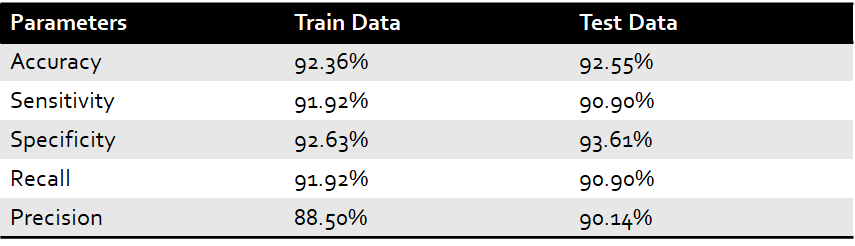
    **We see that our the model is able to predict the conversion rate really well. Hence the demand of the CEO is fulfilled as the metrics here are way above 80% in this model.**

# Final Model Parameters

In [317]:
#checking the parameters of the final model
res.params

const                                           -0.394782
Do Not Email                                    -0.853794
Total Time Spent on Website                      1.074097
Lead Origin_Landing Page Submission             -0.649220
Lead Origin_Lead Add Form                        5.123421
What is your current occupation_Unemployed      -0.811015
Lead Source_Olark Chat                           0.898705
Lead Source_Reference                           -4.222895
Last Activity_SMS Sent                           1.918348
Tags_Busy                                        0.721461
Tags_Closed by Horizzon                          6.818901
Tags_Lost to EINS                                6.558759
Tags_Other Tags                                 -2.815719
Tags_Will revert after reading the email         4.371225
Last Notable Activity_Email Link Clicked        -1.188471
Last Notable Activity_Modified                  -1.761277
Last Notable Activity_Olark Chat Conversation   -2.037923
dtype: float64

**Hence the best variables that increase the lead conversion are(in decreasing order):**
1. Tags_Closed by Horizzon
2. Tags_Lost to EINS 
3. Lead Origin_Lead Add Form 
4. Tags_Will revert after reading the email 
5. Last Activity_SMS Sent
6. Total Time Spent on Website
7. Lead Source_Olark Chat
8. Tags_Busy 

## Additional Insights

### Checking the % count of the customers who are predicted as 1 with changing Lead scores

In [295]:
#Calculating the no of leads who have a lead score of 100 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==100)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

10.707737440410709

In [296]:
#Calculating the no of leads who have a lead score of 90 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==90)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

0.47671433810047675

In [297]:
#Calculating the no of leads who have a lead score of 80 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==80)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

0.29336266960029334

In [298]:
#Calculating the no of leads who have a lead score of 70 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==70)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

0.07334066740007333

In [299]:
#Calculating the no of leads who have a lead score of 60 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==60)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

0.2566923359002567

In [300]:
#Calculating the no of leads who have a lead score of 50 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==50)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

0.11001100110011

In [301]:
#Calculating the no of leads who have a lead score of 40 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==40)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

0.14668133480014667

In [302]:
#Calculating the no of leads who have a lead score of 30 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==30)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

0.11001100110011

In [303]:
#Calculating the no of leads who have a lead score of 20 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==20)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

0.0

In [304]:
#Calculating the no of leads who have a lead score of 10 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==10)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

0.0

In [305]:
#Calculating the no of leads who have a lead score of 0 and are correctly identified by the final model
len(y_pred_final[(y_pred_final["Lead Score"]==0)&(y_pred_final["final_predicted"]==1)])/len(y_pred_final)*100

0.0

**Inferences Drawn:**
1. We see that below a lead score of 30 there are no customers who have been identified as 1 by the model.
2. The % of customers who are potential leads are high in the lead score bracket 90-100
3. The % count is significantly less in people having a lead score less than 90.

# Final Model Parameters

In [317]:
#checking the parameters of the final model
res.params

const                                           -0.394782
Do Not Email                                    -0.853794
Total Time Spent on Website                      1.074097
Lead Origin_Landing Page Submission             -0.649220
Lead Origin_Lead Add Form                        5.123421
What is your current occupation_Unemployed      -0.811015
Lead Source_Olark Chat                           0.898705
Lead Source_Reference                           -4.222895
Last Activity_SMS Sent                           1.918348
Tags_Busy                                        0.721461
Tags_Closed by Horizzon                          6.818901
Tags_Lost to EINS                                6.558759
Tags_Other Tags                                 -2.815719
Tags_Will revert after reading the email         4.371225
Last Notable Activity_Email Link Clicked        -1.188471
Last Notable Activity_Modified                  -1.761277
Last Notable Activity_Olark Chat Conversation   -2.037923
dtype: float64